_Lambda School Data Science_

# Scrape and process data

Objectives
- scrape and parse web pages
- use list comprehensions
- select rows and columns with pandas

Links
-  [Automate the Boring Stuff with Python, Chapter 11](https://automatetheboringstuff.com/chapter11/)
  - Requests
  - Beautiful Soup
- [Python List Comprehensions: Explained Visually](https://treyhunner.com/2015/12/python-list-comprehensions-now-in-color/)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
  - Subset Observations (Rows)
  - Subset Variables (Columns)
- Python Data Science Handbook
  - [Chapter 3.1](https://jakevdp.github.io/PythonDataScienceHandbook/03.01-introducing-pandas-objects.html), Introducing Pandas Objects
  - [Chapter 3.2](https://jakevdp.github.io/PythonDataScienceHandbook/03.02-data-indexing-and-selection.html), Data Indexing and Selection


## Scrape the titles of PyCon 2018 talks

In [0]:
url = 'https://us.pycon.org/2018/schedule/talks/list/'

## 5 ways to look at long titles

Let's define a long title as greater than 80 characters

### 1. For Loop

### 2. List Comprehension

### 3. Filter with named function

### 4. Filter with anonymous function

### 5. Pandas

pandas documentation: [Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html)

## Make new dataframe columns

pandas documentation: [apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html)

### title length

### long title

### first letter

### word count

Using [`textstat`](https://github.com/shivam5992/textstat)

In [2]:
#!pip install textstat

    100% |████████████████████████████████| 3.0MB 8.1MB/s 
  Running setup.py bdist_wheel for textstat ... - done
  Stored in directory: /root/.cache/pip/wheels/04/ac/d7/a05c0ad7825899f11eacd5f9a5a78534808c8159281e65863c
Successfully built textstat


## Rename column

`title length` --> `title character count`

pandas documentation: [rename](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)

## Analyze the dataframe

### Describe

pandas documentation: [describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

### Sort values

pandas documentation: [sort_values](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)

Five shortest titles, by character count

Titles sorted reverse alphabetically

### Get value counts

pandas documentation: [value_counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)


Frequency counts of first letters

Percentage of talks with long titles

### Plot

pandas documentation: [Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html)





Top 5 most frequent first letters

Histogram of title lengths, in characters

# Assignment

**Scrape** the talk descriptions. Hint: `soup.select('.presentation-description')`

**Make** new columns in the dataframe:
- description
- description character count
- description word count
- description grade level (use [this `textstat` function](https://github.com/shivam5992/textstat#the-flesch-kincaid-grade-level) to get the Flesh-Kincaid grade level)

**Describe** all the dataframe's columns. What's the average description word count? The minimum? The maximum?

**Answer** these questions:
- Which descriptions could fit in a tweet?
- What's the distribution of grade levels? Plot a histogram.



In [0]:
import bs4
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
result = requests.get(url)
soup = bs4.BeautifulSoup(result.text)
descriptions = [tag.text.strip()
               for tag in soup.select('.presentation-description')]
print (len(descriptions))
print (descriptions)

95
["At some point every Python programmer sees Python bytecode files -- they're those '.pyc' files Python likes to leave behind after it runs. But have you ever wondered what's really going on in those files? Well, wonder no more! In this talk you'll learn what Python bytecode is and how it's used to execute your code, as well as how to decipher and read it, and how to reason about bytecode to understand the performance of your Python code.", "Until very recently, Apache Spark has been a de facto standard choice of a framework for batch data processing. For Python developers, diving into Spark is challenging, because it requires learning the Java infrastructure, memory management, configuration management. The multiple layers of indirection also make it harder to debug things, especially when throwing the Pyspark wrapper into the equation.\r\n\r\nWith Dask emerging as a pure Python framework for parallel computing, Python developers might be looking at it with new hope, wondering if i

In [29]:
df = pd.DataFrame({'description': descriptions})
df['char count'] = df.description.apply(len)
df.head()

,description,char count
0,At some point every Python programmer sees Pyt...,440
1,"Until very recently, Apache Spark has been a d...",881
2,"In this talk, youâll learn about a category ...",647
3,"âSo tell me,â my manager said, âwhat is ...",1080
4,Recommender systems have become increasingly p...,1147


In [45]:
import textstat
df['descr. word count'] =  df['description'].apply(textstat.lexicon_count)
df.head()

,description,char count,descr. word count,grade level
0,At some point every Python programmer sees Pyt...,440,78,7.4
1,"Until very recently, Apache Spark has been a d...",881,141,14.3
2,"In this talk, youâll learn about a category ...",647,96,11.9
3,"âSo tell me,â my manager said, âwhat is ...",1080,178,16.0
4,Recommender systems have become increasingly p...,1147,188,18.0


In [51]:
df['grade level'] = df['description'].apply(textstat.flesch_kincaid_grade)
df.head()


,description,char count,descr. word count,grade level
0,At some point every Python programmer sees Pyt...,440,78,7.4
1,"Until very recently, Apache Spark has been a d...",881,141,14.3
2,"In this talk, youâll learn about a category ...",647,96,11.9
3,"âSo tell me,â my manager said, âwhat is ...",1080,178,16.0
4,Recommender systems have become increasingly p...,1147,188,18.0


In [54]:
df.describe()

,char count,descr. word count,grade level
count,95.000000,95.000000,95.000000
mean,846.063158,134.578947,18.117895
std,450.107713,70.019082,15.835652
min,201.000000,35.000000,3.700000
25%,550.000000,91.500000,10.500000
50%,758.000000,119.000000,13.800000
75%,978.000000,149.500000,17.950000
max,2794.000000,436.000000,107.800000


In [55]:
df.describe(exclude=np.number)

,description
count,95
unique,95
top,Knowing how to code and being able to teach it...
freq,1


In [77]:
df['tweetable'] = df['char count']<=280
df[df['tweetable'] == True]

,description,char count,descr. word count,grade level,tweetable
44,A function is a small chunk of code that does ...,231,49,3.7,True
62,"For 2 years, a family of three has traveled on...",201,35,15.8,True
65,Python 3 removes a lot of the confusion around...,262,45,6.8,True


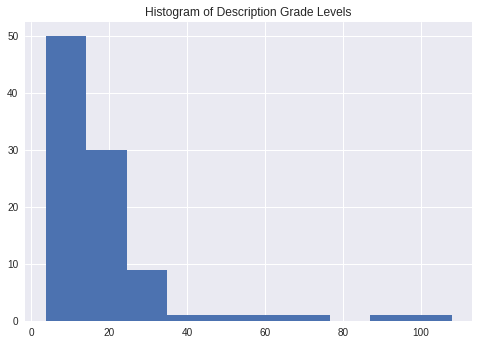

In [76]:
plt.hist(df['grade level'])
plt.title('Histogram of Description Grade Levels')
plt.show();